## Question 1

1.1) Import the necessary libraries

In [1]:
import pandas as pd

1.2 and 1.3) Import the dataset and assign it to a variable called users

In [2]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|' )

In [3]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


1.4) Discover what is the mean age per occupation

In [4]:
mean_age = users.groupby("occupation")["age"].mean()
mean_age.head()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
Name: age, dtype: float64

1.5) Discover the Male ratio per occupation and sort it from the most to the least

In [5]:
occupation_male = (users.groupby('occupation')['gender']
           .value_counts(normalize=True)
           .reset_index(name='percentage'))
occupation_male_only=occupation_male[occupation_male['gender'] == 'M']
sorted_df = occupation_male_only.sort_values(by=['percentage'], ascending=True)
sorted_df.head()

,occupation,gender,percentage
16,homemaker,M,0.142857
14,healthcare,M,0.312500
20,librarian,M,0.431373
2,artist,M,0.535714
0,administrator,M,0.544304


1.6) For each occupation, calculate the minimum and maximum ages

In [6]:
min_age = users.groupby("occupation")["age"].min()
min_age.head()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
Name: age, dtype: int64

In [7]:
max_age = users.groupby("occupation")["age"].max()
max_age.head()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
Name: age, dtype: int64

Another solution

In [8]:
max2_age = users.groupby("occupation").agg({'age': ['min', 'max']})
max2_age.head()

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70

1.7) For each combination of occupation and sex, calculate the mean age

In [9]:
users_male=users[users['gender'] == 'M']
male_occupation=users_male.groupby("occupation")["age"].mean()
male_occupation.head()

occupation
administrator    37.162791
artist           32.333333
doctor           43.571429
educator         43.101449
engineer         36.600000
Name: age, dtype: float64

In [10]:
users_female=users[users['gender'] == 'F']
female_occupation=users_female.groupby("occupation")["age"].mean()
female_occupation.head()

occupation
administrator    40.638889
artist           30.307692
educator         39.115385
engineer         29.500000
entertainment    31.000000
Name: age, dtype: float64

1.8) For each occupation present the percentage of women and men


In [11]:
occupation_perc = (users.groupby('occupation')['gender']
           .value_counts(normalize=True)
           .reset_index(name='percentage'))
occupation_perc.head()

,occupation,gender,percentage
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000


## QUESTION 2

2.1) Import the necessary libraries

In [13]:
import pandas as pd

2.2 and 2.3) Import the dataset and assign it to a variable called users

In [14]:
euro12 = pd.read_table('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


2.4) Select only the Goal column

In [15]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

2.5) How many team participated in the Euro2012?

In [16]:
euro12['Team'].count()

16

2.6) What is the number of columns in the dataset?

In [17]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Answer: The dataset has 35 columns

2.7) View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline

In [18]:
eurocards = euro12[['Team','Yellow Cards','Red Cards']]
eurocards.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


2.8) Sort the teams by Red Cards, then to Yellow Cards

In [19]:
sorted_red = eurocards.sort_values(by=['Red Cards'], ascending=False)
sorted_red.head()

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
0,Croatia,9,0
1,Czech Republic,7,0


In [20]:
sorted_yellow = sorted_red.sort_values(by=['Yellow Cards'], ascending=False)
sorted_yellow.head()

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
6,Greece,9,1
0,Croatia,9,0


2.9) Calculate the mean Yellow Cards given per Team

In [21]:
mean_yellow = eurocards.groupby("Team")["Yellow Cards"].mean()
mean_yellow.head()

Team
Croatia           9
Czech Republic    7
Denmark           4
England           5
France            6
Name: Yellow Cards, dtype: int64

2.10) Filter teams that scored more than 6 goals

In [22]:
euro12[euro12['Goals']>6].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


2.11) Select the teams that start with G

In [26]:
Team_G=euro12[euro12["Team"].str.startswith('G')]["Team"]
print(Team_G)

5    Germany
6     Greece
Name: Team, dtype: object


2.12) Select the first 7 columns

In [24]:
euro12[euro12.columns[0:7]].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65


2.13) Select all columns except the last 3

In [29]:
except_last3 = euro12.iloc[:,:-3]
print(except_last3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

2.14)Present only the Shooting Accuracy from England, Italy and Russia

In [31]:
euro12 = euro12.set_index("Team")
print(euro12[(euro12.index == "England") | (euro12.index == "Italy") | (euro12.index == "Russia" )]["Shooting Accuracy"])

Team
England    50.0%
Italy      43.0%
Russia     22.5%
Name: Shooting Accuracy, dtype: object


## Question 3

3.1) Import the necessary libraries

In [46]:
import pandas as pd
import numpy as np

3.2)  Create 3 different Series, each of length 100, as follows:

3.2.1) The first a random number from 1 to 4



In [50]:
Serie1 = pd.Series(np.random.randint(1,5, size=(100)))
print(Serie1)

0     2
1     1
2     1
3     2
4     3
     ..
95    1
96    3
97    1
98    4
99    1
Length: 100, dtype: int32


3.2.2) The second a random number from 1 to 3

In [52]:
Serie2 = pd.Series(np.random.randint(1,4, size=(100)))
print(Serie2)

0     1
1     2
2     3
3     3
4     3
     ..
95    2
96    1
97    3
98    1
99    3
Length: 100, dtype: int32


3.2.3) The third a random number from 10,000 to 30,000

In [53]:
Serie3 = pd.Series(np.random.randint(10001,30001, size=(100)))
print(Serie3)

0     11030
1     24085
2     12379
3     11642
4     12123
      ...  
95    26950
96    26026
97    24528
98    24653
99    14577
Length: 100, dtype: int32


3.3 and 3.4) Create a DataFrame by joinning the Series by column and change the name of the columns to bedrs, bathrs, price_sqr_meter

In [59]:
dataframe = pd.DataFrame({'bedrs':Serie1,'bathrs':Serie2,'price_sqr_meter':Serie3})
print(dataframe)

    bedrs  bathrs  price_sqr_meter
0       2       1            11030
1       1       2            24085
2       1       3            12379
3       2       3            11642
4       3       3            12123
..    ...     ...              ...
95      1       2            26950
96      3       1            26026
97      1       3            24528
98      4       1            24653
99      1       3            14577

[100 rows x 3 columns]


3.5) Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'


In [61]:
bigcolumn = pd.concat([Serie1, Serie2, Serie3])

print(bigcolumn)

0         2
1         1
2         1
3         2
4         3
      ...  
95    26950
96    26026
97    24528
98    24653
99    14577
Length: 300, dtype: int32


3.6) Ops it seems it is going only until index 99. Is it true?

Answer: Yes it does

3.7) Reindex the DataFrame so it goes from 0 to 299

In [65]:
bigcolumn.index = pd.RangeIndex(start=0,stop=300)

print(bigcolumn)

0          2
1          1
2          1
3          2
4          3
       ...  
295    26950
296    26026
297    24528
298    24653
299    14577
Length: 300, dtype: int32


## Question 4

4.1) Import the necessary libraries

In [81]:
import numpy as np
import pandas as pd
import datetime

4.2 and 4.3) Import the dataset and assign it to a variable called data and replace the first 3 columns by a proper
datetime index

In [94]:
data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+",parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [133]:
data_rename = data.rename(columns = {"Yr_Mo_Dy" : "Date"}, inplace = True)
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,0
1,1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1
2,2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2
3,3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,3
4,4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,4


4.4) Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

In [137]:
def Year_2061(x):
    year=x.year-100 if x.year > 1979 else x.year
    return datetime.date(year,x.month,x.day)
data["Date"]=data["Date"].apply(Year_2061)
data.head()

AttributeError: 'int' object has no attribute 'year'

4.5) Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

In [107]:
data_rename["Date"]=pd.to_datetime(data["Date"])
data_rename=data_rename.set_index("Date")
data_rename.head()

TypeError: 'NoneType' object does not support item assignment

4.6) Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

In [111]:
data.isnull().sum()

Date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

4.7) Compute how many non-missing values there are in total.

In [112]:
data.notna().sum()

Date    6574
RPT     6568
VAL     6571
ROS     6572
KIL     6569
SHA     6572
BIR     6574
DUB     6571
CLA     6572
MUL     6571
CLO     6573
BEL     6574
MAL     6570
dtype: int64

4.8) Calculate the mean windspeeds of the windspeeds over all the locations and
all the times. A single number for the entire dataset.

In [113]:
data.mean().mean()

10.227982360836924

4.9) Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days. A different set of numbers for each location

In [117]:
loc_stats=pd.DataFrame()
loc_stats["min"]=data.min(axis=0)
loc_stats["max"]=data.max(axis=0)
loc_stats["mean"]=data.mean(axis=0)
loc_stats["sd"]=data.std(axis=0)
print(loc_stats)

             min         max       mean        sd
Date  1961-01-01  1978-12-31        NaN       NaN
RPT         0.67        35.8  12.362987  5.618413
VAL         0.21       33.37  10.644314  5.267356
ROS          1.5       33.84  11.660526  5.008450
KIL            0       28.46   6.306468  3.605811
SHA         0.13       37.54  10.455834  4.936125
BIR            0       26.16   7.092254  3.968683
DUB            0       30.37   9.797343  4.977555
CLA            0       31.08   8.495053  4.499449
MUL            0       25.88   8.493590  4.166872
CLO         0.04       28.21   8.707332  4.503954
BEL         0.13       42.38  13.121007  5.835037
MAL         0.67       42.54  15.599079  6.699794


4.10) Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day. A different set of numbers for each day.

In [119]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['sd']=data.std(axis=1)
print(day_stats)

       min    max       mean        sd
0     9.29  18.50  13.018182  2.808875
1     6.50  17.54  11.336364  3.188994
2     6.17  18.50  11.641818  3.681912
3     1.79  11.75   6.619167  3.198126
4     6.17  13.33  10.630000  2.445356
...    ...    ...        ...       ...
6569  8.08  40.08  16.708333  7.868076
6570  5.00  41.46  15.150000  9.687857
6571  8.71  29.58  14.890000  5.756836
6572  9.13  28.79  15.367500  5.540437
6573  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


4.11) Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

4.12) Downsample the record to a yearly frequency for each location.

4.13) Downsample the record to a monthly frequency for each location.

4.14) Downsample the record to a weekly frequency for each location

4.15) Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

## Question 5


5.1) Import the necessary libraries

In [32]:
import pandas as pd

5.2 and 5.3) Import dataset, assign to chipo

In [50]:
chipo = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

 5.4) See the first 10 entries

In [52]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


5.5) What is the number of observations in the dataset?

In [65]:
print(chipo.size)

23110


5.6) What is the number of columns in the dataset?

In [67]:
print(chipo.shape[1])

5


5.7) Print the name of all the columns.

In [70]:
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


5.8) How is the dataset indexed?

In [71]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

5.9) Which was the most-ordered item?

In [38]:
print(chipo[chipo.quantity==chipo.quantity.max()].item_name)

3598    Chips and Fresh Tomato Salsa
Name: item_name, dtype: object


5.10) For the most-ordered item, how many items were ordered?

In [39]:
print(chipo[chipo.quantity==chipo.quantity.max()].quantity)

3598    15
Name: quantity, dtype: int64


5.11) What was the most ordered item in the choice_description column?

In [40]:
print(chipo.groupby('choice_description').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(1).index[0])

[Diet Coke]


5.12) How many items were orderd in total?


In [41]:
print(chipo.quantity.sum())

4972


5.13.1) Turn the item price into a float

In [42]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

5.13.2) Check the item price type

In [43]:
print(chipo['item_price'].dtype)

float64


5.13.3) Create a lambda function and change the type of item price


In [44]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$', '')))

AttributeError: 'float' object has no attribute 'replace'

5.13.4) Check the item price type

In [45]:
print(chipo['item_price'].dtype)

float64


5.14) How much was the revenue for the period in the dataset?

In [46]:
print(chipo['item_price'].sum())

34500.16


5.15) How many orders were made in the period?

In [47]:
print(len(chipo.groupby('order_id').agg({'order_id':'count'})))

1834


5.16) What is the average revenue amount per order?


In [48]:
print(chipo.groupby('order_id').agg({'item_price':'mean'}).mean())

item_price    7.841911
dtype: float64


5.17) How many different items are sold?


In [49]:
print(len(chipo.groupby('item_name').agg({'item_name':'count'})))

50


## Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [53]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_table('C:\\Users\\claud\\BIG DATA COURSE\\06 Data Programming\\[ASSIGNMENT] Problem Set 3\\us-marriages-divorces-1867-2014.csv', sep = ',')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [55]:
mar_div = df[df.columns[0:3]]
line_table = mar_div.set_index('Year')

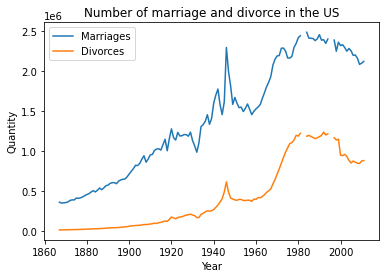

In [56]:
lines = line_table.plot.line()
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Number of marriage and divorce in the US')
plt.legend()
plt.show()

## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [57]:
array = ['1900','1950','2000']
df2 = df.loc[df['Year'].isin(array)]
df2.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


In [58]:
mar_div2 = df2[df2.columns[0:3]]
vbar_table = mar_div2.set_index('Year')

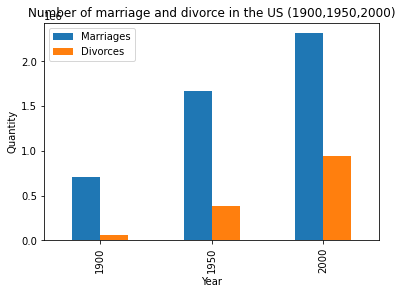

In [59]:
bar = vbar_table.plot.bar()
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Number of marriage and divorce in the US (1900,1950,2000)')
plt.legend()
plt.show()

## Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


In [60]:
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
hollywood = pd.read_table('C:\\Users\\claud\\BIG DATA COURSE\\06 Data Programming\\[ASSIGNMENT] Problem Set 3\\actor_kill_counts.csv', sep = ',')
hollywood.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


                       Count
Actor                       
Arnold Schwarzenegger    369
Chow Yun-Fat             295
Clint Eastwood           207
Clive Owen               194
Dolph Lundgren           239
Jet Li                   201
Nicolas Cage             204
Sylvester Stallone       267
Tomisaburo Wakayama      226
Wesley Snipes            193


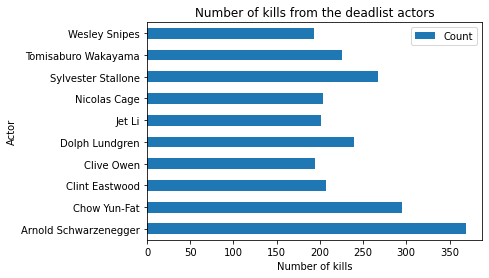

In [62]:
hollywood.sort_values(by=['Count'], ascending=True)
final = hollywood.set_index('Actor')
print(final)
barh = final.plot.barh()
plt.xlabel('Number of kills')
plt.ylabel('Actor')
plt.title('Number of kills from the deadlist actors')
plt.legend()
plt.show()

## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
emperor = pd.read_table('C:\\Users\\claud\\BIG DATA COURSE\\06 Data Programming\\[ASSIGNMENT] Problem Set 3\\roman-emperor-reigns.csv', sep = ',')
emperor.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [38]:
empass = emperor[emperor['Cause_of_Death'] == "Assassinated"].head()

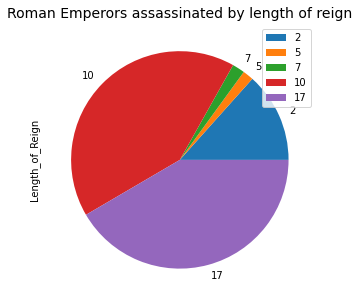

In [45]:
plot = empass.plot.pie(y='Length_of_Reign', figsize=(5, 5))
plt.title("Roman Emperors assassinated by length of reign", fontsize=14);


## Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.


In [12]:
import seaborn as sns
import pandas as pd

In [13]:
Tech_earn = pd.read_table('C:\\Users\\claud\\BIG DATA COURSE\\06 Data Programming\\[ASSIGNMENT] Problem Set 3\\arcade-revenue-vs-cs-doctorates.csv', sep = ',')
Tech_earn.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


Text(0.5, 1.0, 'Comparison between gamers and PhDs in the US')

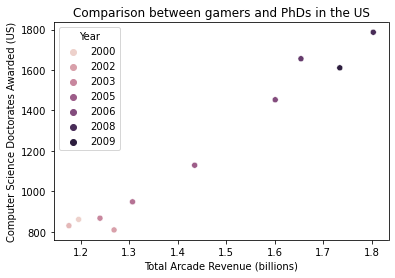

In [18]:
sns.scatterplot(data=Tech_earn, x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year").set_title("Comparison between gamers and PhDs in the US")
